In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
df = pd.read_csv(url, header=None)

In [ ]:
x= df.iloc[:, :-1]  # Features

y = df.iloc[:, -1]  #target



In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('svm',SVC(probability=True))
])

In [23]:
pipeline,y_train

(Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))]),
 1370    1
 3038    0
 2361    0
 156     1
 2526    0
        ..
 4426    0
 466     1
 3092    0
 3772    0
 860     1
 Name: 57, Length: 3680, dtype: int64)

In [24]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])

In [25]:

y_pred = pipeline.predict(x_test)


In [26]:
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.9348534201954397
Confusion Matrix:
[[513  18]
 [ 42 348]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.95      0.89      0.92       390

    accuracy                           0.93       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.93      0.93       921

ROC AUC Score: 0.9292046936114733


In [28]:

cv_scores = cross_val_score(pipeline, x, y, cv=10, scoring='accuracy')
print(f'Cross-validated Accuracy: {cv_scores.mean()}')


Cross-validated Accuracy: 0.9278421201546733


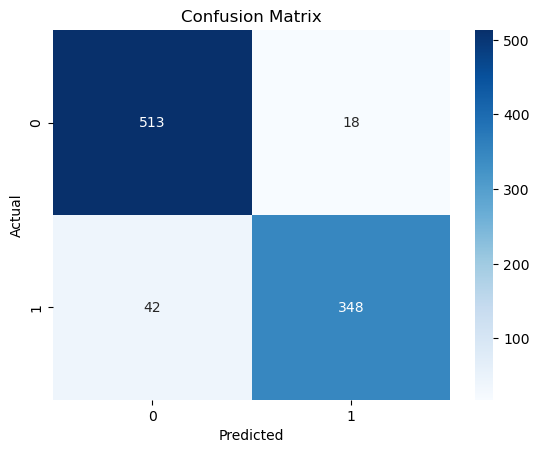

In [29]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()